## Тестовое задание Awem games


**Краткое описание игры**

Cradle of Empires – это успешная казуальная free-2play игра для мобильных устройств, стоящая на стыке трех жанров: Match-3, City Builder, Adventure. Ниже насколько возможно кратко (полное описание могло бы занять несколько страниц) описаны некоторые точки игровой механики.
Играя в уровни Match-3 игрок получает ресурсы (золото, еда, материалы), которые может потратить на строительство или улучшение новых зданий, которые, в свою очередь, открывают доступ к новым уровням, возможностям, бонусам.
Кроме того, ресурсы могут быть потрачены на заказы сделок в тотемах, которые дают игроку бонусы определенных видов (Молоток, Миксер, Молния и т.д.).
Кроме бонусов из тотемов, в игре присутствуют другие виды игровых сущностей, призванных облегчить игроку прогресс по игре (идолы, амулеты и т.д.).
Движение игрока по игре направляется квестовой системой, в основе которой лежит сбор различных предметов, которые также получаются за успешное прохождение уровней. Предметы используются при сборе коллекций.
В игре присутствует премиальная валюта – кристаллы, которые могут быть потрачены на ускорение большинства игровых действий, покупку игровых
сущностей и т.д.

**Цель задания:** составить аналитическую записку, которая бы отвечала на следующие вопросы:
- Какое влияние произведенное изменение оказало на игру в целом? Было ли оно положительным или отрицательным? Обоснуйте свой ответ.
- На какие игровые показатели изменение скорости производства бонусов в тотемах оказало наибольшее влияние и почему? Сформулируйте и обоснуйте гипотезы, которые бы освещали возможные причины такого влияния. Рассматривать все взаимосвязи необязательно – только те, которые вы посчитаете наиболее значимыми.
- Есть ли на рассматриваемом игровом промежутке проблемы, требующие решения разработчиков? Что на Ваш взгляд можно было бы и изменить и как?
- Какие еще данные помогли бы Вам лучше разобраться в игре, ее проблемах, просто стоят внимания с Вашей точки зрения? Почему?

**Входные данные:** данные по набору показателей из двух версий игры. Данные собраны за сопоставимые по продолжительности периоды и по сопоставимым по размеру группам игроков.
Версия 1.0 отличается от версии 2.0 лишь одним параметром – **скоростью производства бонусов** в тотемах (тотемы представляют собой источник бесплатных бонусов для игрока. Бонусы производятся в тотеме за счёт ресурсов, в текущей версии Cradle of Empires, которую можно скачать со сторов, доступны c 11 уровня славы, раньше, в анализируемых версиях v1 и v2, были доступны с 4 уровня). Остальные параметры игры изменены не были.

**Описание данных:**
- Version – версия игры
- Id – внутри-игровой уникальный идентификатор пользователя
- Level – уровень славы (аналог уровней опыта в других играх)
- M3 start – количество стартов macth-3 уровней
- M3 finish – количество успешных завершений match-3 уровней
- Crystal free – количество кристаллов, полученное из бесплатных
источников (просмотр рекламы, ежедневные награды)
- Get gold – сумма полученного за уровень золота
- Get food – сумма полученной за уровень еды
- Get stuff – сумма полученных за уровень материалов
- Buy gold – сумма купленного за премиум-валюту золота
- Buy food – сумма купленной за премиум-валюту еды
- Buy stuff – сумма купленных за премиум-валюту материалов
- Get bonus – количество полученных из тотемов бонусов
- Buy bonus – количество купленных за премиум-валюту бонусов
- Quest complete – количество выполненных квестов
- Buy energy – количество купленных за премиум-валюту энергетиков
- Buy charge – количество купленных за премиум-валюту зарядок
- Buy amulet – количество купленных за премиум-валюту амулетов (свитков с заклинаниями)
- Collection complete – количество заряженных коллекций (для зарядки которых необходимы такие предметы как «зарядки»)    

In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as st
import re
import matplotlib.pyplot as plt

### Изучение данных

In [123]:
#Загрузим данные
data = pd.read_csv("ТЗ Game Analyst (Data Scientist).csv")

In [124]:
#Информация о данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4360 entries, 0 to 4359
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Version              4360 non-null   object
 1   id                   4360 non-null   int64 
 2   Level                4360 non-null   int64 
 3   M3 start             4360 non-null   int64 
 4   M3 finish            4360 non-null   int64 
 5   Crystall free        4360 non-null   int64 
 6   Get gold             4360 non-null   int64 
 7   Get food             4360 non-null   int64 
 8   Get stuff            4360 non-null   int64 
 9   Buy gold             4360 non-null   int64 
 10  Buy food             4360 non-null   int64 
 11  Buy stuff            4360 non-null   int64 
 12  Get bonus            4360 non-null   int64 
 13  Buy bonus            4360 non-null   int64 
 14  Quest complete       4360 non-null   int64 
 15  Buy energy           4360 non-null   int64 
 16  Buy ch

In [125]:
#Первые 5 строк датасета
data.head()

,Version,id,Level,M3 start,M3 finish,Crystall free,Get gold,Get food,Get stuff,Buy gold,Buy food,Buy stuff,Get bonus,Buy bonus,Quest complete,Buy energy,Buy charge,Buy amulet,Collection complete
0,v2,958203,1,5,5,5,1069,0,0,0,0,0,0,0,2,0,0,0,0
1,v1,519908,10,184,156,19,57252,28704,25584,1145,861,512,76,9,16,4,12,6,4
2,v2,888712,7,93,78,17,30186,8112,5928,1207,406,59,10,27,13,6,4,5,3
3,v1,571031,4,38,32,11,6784,1184,1768,271,83,0,16,6,10,0,3,0,2
4,v2,911796,3,27,26,9,4966,780,0,248,47,0,0,5,4,1,0,0,0


<div class="alert alert-block alert-info">
Всего в исходных данных представлена информация о 4360 записях по наборам показателей, типы данных в исходном наборе - int, object.

### Предобработка данных

In [126]:
#Приведём название полей к змеиному типу
for name in data.columns:
    pattern = r"\s"
    rena = re.sub(pattern, '_', name).lower()
    data = data.rename(columns={name:rena})

#### Обработка пропусков

In [127]:
data.isna().sum()

version                0
id                     0
level                  0
m3_start               0
m3_finish              0
crystall_free          0
get_gold               0
get_food               0
get_stuff              0
buy_gold               0
buy_food               0
buy_stuff              0
get_bonus              0
buy_bonus              0
quest_complete         0
buy_energy             0
buy_charge             0
buy_amulet             0
collection_complete    0
dtype: int64

<div class="alert alert-block alert-info">
Пропуски обнаружены не были

#### Проверка на дубликаты

In [128]:
data.duplicated().sum()

0

<div class="alert alert-block alert-info">
Явные записи-дубликаты обнаружены не были

### Исследование аномалий

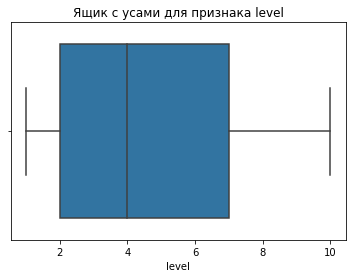

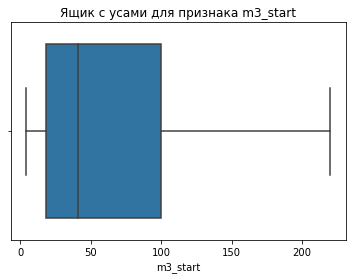

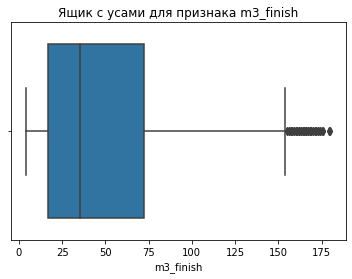

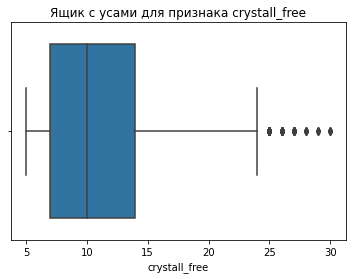

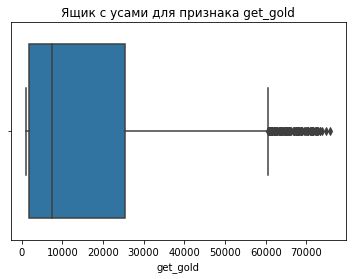

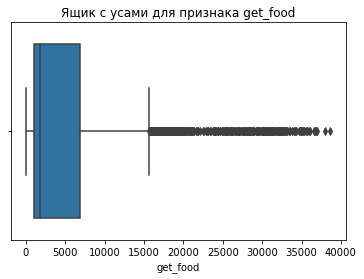

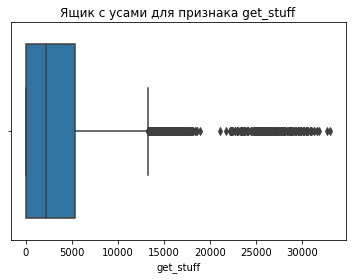

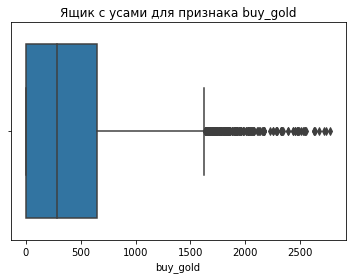

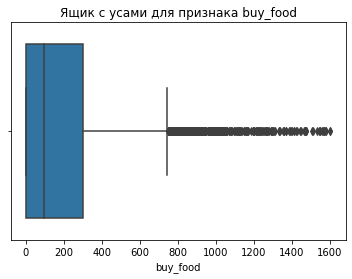

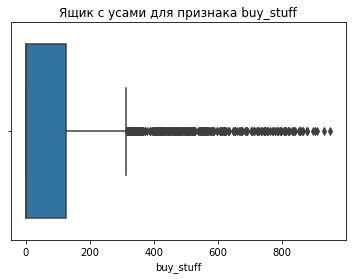

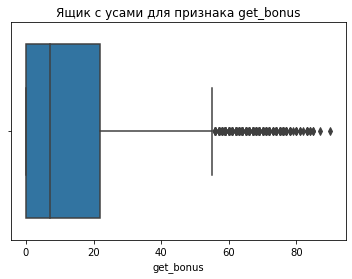

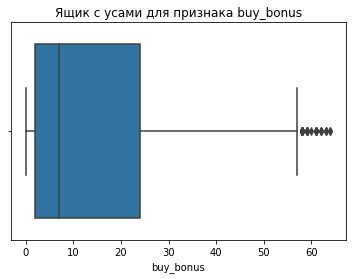

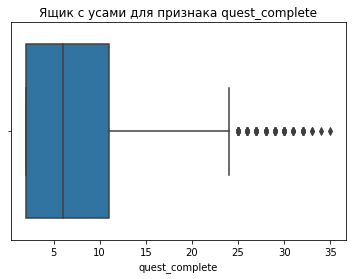

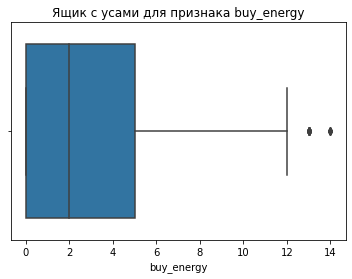

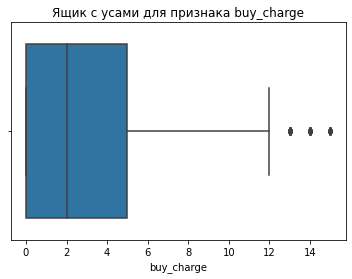

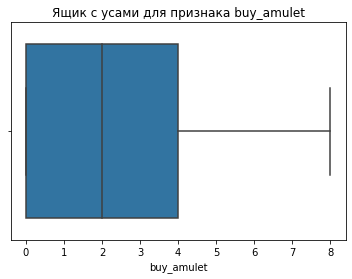

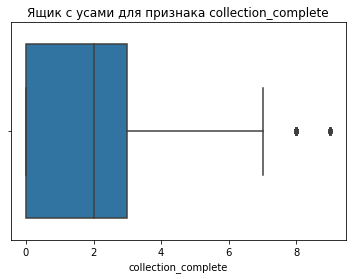

In [129]:
for column in data.loc[:,'level':'collection_complete'].columns:
    sns.boxplot(x=data[column])
    plt.title("Ящик с усами для признака " + column)
    plt.show()

<div class="alert alert-block alert-info">
Видно, что аномальные значения, выходящие за пределы усов диаграммы размаха присутствуют у полей: m3_finish, crystall_free, get_gold, get_food, get_stuff', 'buy_gold', 'buy_food',
       buy_stuff, get_bonus, buy_bonus, quest_complete, buy_energy, buy_charge, collection_complete.

In [130]:
anomaly_columns = ['m3_finish', 'crystall_free', 'get_gold', 'get_food', 'get_stuff', 'buy_gold', 'buy_food', 'buy_stuff', 'get_bonus', 'buy_bonus', 'quest_complete', 'buy_energy', 'buy_charge', 'collection_complete']

In [131]:
#Посмотрим на количество объектов по каждому из перечисленных признаков, выходящих за пределы усов диаграммы размаха.
for column in anomaly_columns:
    data1 = sorted(data[column])
    q1 = np.percentile(data1, 25)
    q3 = np.percentile(data1, 75)
    IQR = q3-q1
    upper = q3 + (1.5*IQR)
    print("Верхний порог признака: " + column, upper)
    print("Количество аномальных значений признака " + column + ":", len(data.loc[data[column] > upper]))

Верхний порог признака: m3_finish 154.5
Количество аномальных значений признака m3_finish: 128
Верхний порог признака: crystall_free 24.5
Количество аномальных значений признака crystall_free: 96
Верхний порог признака: get_gold 60646.875
Количество аномальных значений признака get_gold: 134
Верхний порог признака: get_food 15635.0
Количество аномальных значений признака get_food: 462
Верхний порог признака: get_stuff 13275.0
Количество аномальных значений признака get_stuff: 514
Верхний порог признака: buy_gold 1628.125
Количество аномальных значений признака buy_gold: 218
Верхний порог признака: buy_food 747.5
Количество аномальных значений признака buy_food: 352
Верхний порог признака: buy_stuff 312.5
Количество аномальных значений признака buy_stuff: 371
Верхний порог признака: get_bonus 55.0
Количество аномальных значений признака get_bonus: 208
Верхний порог признака: buy_bonus 57.0
Количество аномальных значений признака buy_bonus: 44
Верхний порог признака: quest_complete 24.5


In [132]:
#Посмотрим на объекты, которые превышают пороговое значение по первому признаку
data[data['m3_finish'] > 154.5]

,version,id,level,m3_start,m3_finish,crystall_free,get_gold,get_food,get_stuff,buy_gold,buy_food,buy_stuff,get_bonus,buy_bonus,quest_complete,buy_energy,buy_charge,buy_amulet,collection_complete
1,v1,519908,10,184,156,19,57252,28704,25584,1145,861,512,76,9,16,4,12,6,4
6,v1,695773,10,197,169,24,65572,27040,25857,1311,1352,517,83,14,22,12,8,4,4
54,v2,943882,10,207,155,23,62465,31620,27280,312,632,164,25,48,28,11,11,4,7
69,v2,885093,10,216,173,24,74909,34254,31659,449,685,222,29,52,24,11,13,6,8
81,v2,937831,10,220,174,17,69774,33582,31842,209,336,159,21,61,28,10,10,4,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4207,v1,506319,10,193,166,22,62416,31374,27888,1248,1569,558,68,13,25,6,11,7,5
4232,v2,962517,10,209,165,18,73260,32505,29040,293,650,261,30,48,23,11,14,2,8
4237,v1,669751,10,193,168,19,60984,31752,30240,1830,1270,605,76,15,18,4,12,8,5
4282,v1,596238,10,194,167,18,63293,33066,26553,1899,992,797,70,13,18,7,9,8,4


<div class="alert alert-block alert-info">
Если посмотреть на объекты, которые превышают пороговое значение по первому признаку, то видим, что у них в основном большие значения по всем показателям. Удалять и обрабатывать эти аномалии никак не будем, это группа не очень активных игроков.

### Исследовательский анализ данных

In [133]:
#Разделим выборку на 2 в соответствие с версией
data_v1 = data[data['version'] == 'v1']
data_v2 = data[data['version'] == 'v2']

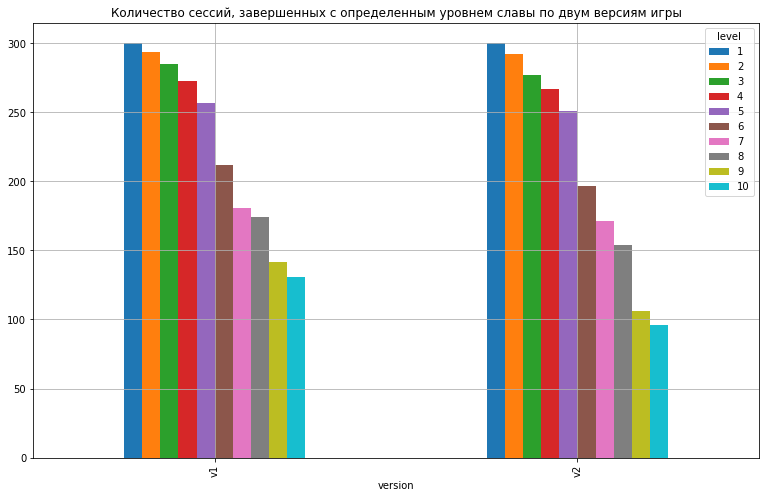

In [134]:
#Посмотрим на количество сессий, завершенных с определенным уровнем славы по двум версиям игры
data\
.pivot_table('id', index='version', columns='level', aggfunc='count')\
.plot(kind='bar', figsize=(13,8), grid=True, title='Количество сессий, завершенных с определенным уровнем славы по двум версиям игры')
plt.show()

<div class="alert alert-block alert-info">
Видно, что количество завершенных игр с более высоким уровнем ниже в игре версии 2 по сравнению с игрой версии 1 для соответствующих уровней.

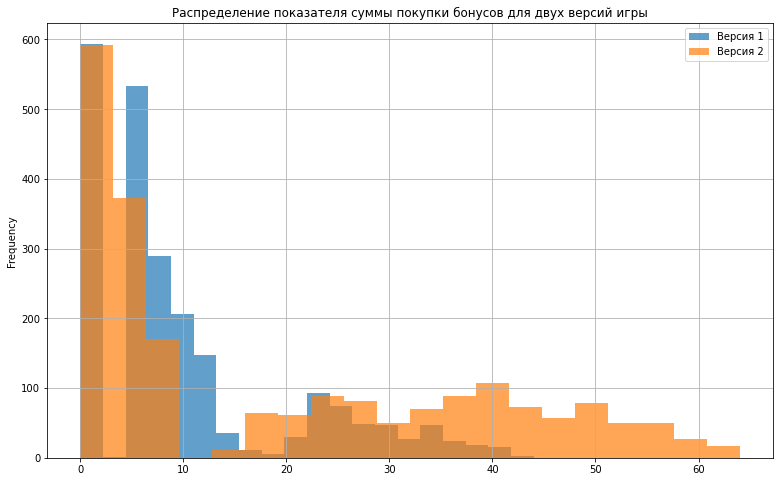

In [135]:
#Посмотрим на распределение показателя суммы покупки бонусов для двух версий игры
ax = data_v1.plot(
    kind='hist',
    y='buy_bonus',
    bins=20, 
    alpha=0.7, 
    label="Версия 1", 
    title="Распределение показателя суммы покупки бонусов для двух версий игры",
    grid=True,
    figsize=(13,8)
)
data_v2.plot(
    kind="hist",
    y='buy_bonus',
    bins=20,
    ax=ax,
    label='Версия 2',
    alpha=0.7,
    grid=True
)
plt.show()

<div class="alert alert-block alert-info">
Видно, что распределения похожи для двух версий игры, но для 2 версии есть суммы покупки большего числа бонусов.

### Ответы на поставленные запросы

- Какое влияние произведенное изменение оказало на игру в целом? Было ли оно положительным или отрицательным?

<div class="alert alert-block alert-info">
Посчитаем аналог такого показателя, как Daily sessions per day (Daily Sessions(количество сессий в день) / DAU. Мы не знаем за какой период у нас выгружены данные. 
Значит поделим количество сессий за представленный период на количество уникальных (активных) пользователей для каждой версии игры.

In [136]:
print("Количество уникальных пользователейв в выборке с 1 версией игры:", len(data_v1['id'].unique()))
print("Количество уникальных пользователейв в выборке с 2 версией игры:", len(data_v2['id'].unique()))

Количество уникальных пользователейв в выборке с 1 версией игры: 300
Количество уникальных пользователейв в выборке с 2 версией игры: 300


In [137]:
print("Количество сессий на одного пользователя за период для версии 1:", round(len(data_v1) / len(data_v1['id'].unique()), 2) )
print("Количество сессий на одного пользователя за период для версии 2:", round(len(data_v2) / len(data_v2['id'].unique()), 2) )

Количество сессий на одного пользователя за период для версии 1: 7.5
Количество сессий на одного пользователя за период для версии 2: 7.04


<div class="alert alert-block alert-info">
Видно, что количество сессий на одного пользователя за представленный период для второй версии уменьшилось.

<div class="alert alert-block alert-info">
Для оценки влияния изменения посчитаем конверсию для каждой версии игры имеющихся выборок  по пользователям таких целевых действий: 
    
- Buy gold – сумма купленного за премиум-валюту золота
- Buy food – сумма купленной за премиум-валюту еды
- Buy stuff – сумма купленных за премиум-валюту материалов
- Buy bonus – количество купленных за премиум-валюту бонусов
- Buy energy – количество купленных за премиум-валюту энергетиков
- Buy charge – количество купленных за премиум-валюту зарядок
- Buy amulet – количество купленных за премиум-валюту амулетов (свитков с заклинаниями)

In [138]:
def conversion(data, feature):
    group = pd.DataFrame(data.groupby('id')[feature].sum())
    return round(len(group[group[feature] != 0]) / len(group) * 100, 2)

In [139]:
print("Конверсия показателей в двух версиях игры для каждого пользователя:")
conversions = pd.DataFrame({'Версия 1, %': [conversion(data_v1, 'buy_gold'), conversion(data_v1, 'buy_food'), conversion(data_v1, 'buy_stuff'), conversion(data_v1, 'buy_bonus'), conversion(data_v1, 'buy_energy'), conversion(data_v1, 'buy_charge'), conversion(data_v1, 'buy_amulet')],
             'Версия 2, %': [conversion(data_v2, 'buy_gold'), conversion(data_v2, 'buy_food'), conversion(data_v2, 'buy_stuff'), conversion(data_v2, 'buy_bonus'), conversion(data_v2, 'buy_energy'), conversion(data_v2, 'buy_charge'), conversion(data_v2, 'buy_amulet')]})
conversions.index = ['Buy gold', 'Buy food', 'Buy stuff', 'Buy bonus', 'Buy energy', 'Buy charge', 'Buy amulet']
display(conversions)

Конверсия показателей в двух версиях игры для каждого пользователя:


,"Версия 1, %","Версия 2, %"
Buy gold,95.00,92.33
Buy food,95.00,92.33
Buy stuff,85.67,83.67
Buy bonus,98.00,97.33
Buy energy,93.67,91.33
Buy charge,91.00,89.00
Buy amulet,91.67,89.33


<div class="alert alert-block alert-info">
Сгруппировали по пользователям каждый из перечисленных показателей и посчитали конверсию целевого действия для имеющихся выборок. Видим, что по всем перечисленным признакам процент конверсии упал во второй версии, то есть процент пользователей, покупающих за премиум-валюту уменьшился. Конверсию оценивают на этапе стабилизации аудитории при первых клиентов. Когда целью является стимулирование продаж оценивают другие метрики, например: sales funnel, average revenue per user, churn rate, incremental sales и другие. 

<div class="alert alert-block alert-info">
У нас нет данных о стоимости покупок, поэтому оценим, увеличилась ли средняя сумма покупки бонусов на одного пользователя и   изменилась ли средняя сумма полученных бонусов на одного пользователя для этого проверим 2 гипотезы.

In [140]:
#Напишем функцию для проверки гипотез равенства двух совокупностей
def hypothesis(array1, array2):
    alpha = 0.05
    results = st.ttest_ind(
        array1,
        array2
    )
    print('p-значение:', results.pvalue)
    print('Значение статистики (отклонения):', results.statistic)
    if results.pvalue < alpha:
        print('Нулевую гипотезу отклоняем')
    else:
        print('Принимаем нулевую гипотезу о равенстве средних двух выборок')

#### Проверка гипотезы о равенстве средних суммы купленных бонусов для каждого пользователя в двух выборках

<div class="alert alert-block alert-info">
    
**Проверить гипотезу:**
Средние суммы купленных бонусов пользователя игр для версии 1 и 2 равны.
  
    
**H0:** Средние суммы купленных бонусов пользователя игр для версии 1 и 2 равны.
    
    
**H1:** Средние суммы купленных бонусов пользователя игр для версии 1 и 2 различны.

In [141]:
buy_bonus_v1 = data_v1.groupby('id')['buy_bonus'].sum()
buy_bonus_v2 = data_v2.groupby('id')['buy_bonus'].sum()

In [142]:
hypothesis(buy_bonus_v1, buy_bonus_v2)

p-значение: 3.081051642883544e-22
Значение статистики (отклонения): -10.096372918211134
Нулевую гипотезу отклоняем


In [143]:
print("Средняя сумма купленных бонусов одним пользователем игры версии 1: ", round(data_v1.groupby('id')['buy_bonus'].sum().mean(), 1))
print("Средняя сумма купленных бонусов одним пользователем игры версии 2: ", data_v2.groupby('id')['buy_bonus'].sum().mean())

Средняя сумма купленных бонусов одним пользователем игры версии 1:  74.2
Средняя сумма купленных бонусов одним пользователем игры версии 2:  133.05


<div class="alert alert-block alert-info">
Таким образом, гипотеза подтвердила, что средняя сумма купленных бонусов одним пользователем увеличилась.

#### Проверка гипотезы о равенстве средних суммы полученных бонусов для каждого пользователя в двух выборках

<div class="alert alert-block alert-info">
    
**Проверить гипотезу:**
Средние суммы полученных бонусов пользователя игр для версии 1 и 2 равны.
  
    
**H0:** Средние суммы полученных бонусов пользователя игр для версии 1 и 2 равны.
    
    
**H1:** Средние суммы полученных бонусов пользователя игр для версии 1 и 2 различны.

In [144]:
get_bonus_v1 = data_v1.groupby('id')['get_bonus'].sum()
get_bonus_v2 = data_v2.groupby('id')['get_bonus'].sum()

In [145]:
hypothesis(get_bonus_v1, get_bonus_v2)

p-значение: 9.394863964488317e-51
Значение статистики (отклонения): 16.51443891508714
Нулевую гипотезу отклоняем


In [146]:
print("Среднее суммы полученных бонусов одним пользователем игр для версии 1:", round(data_v1.groupby('id')['get_bonus'].sum().mean(), 2))
print("Среднее суммы полученных бонусов одним пользователем игр для версии 2:", round(data_v2.groupby('id')['get_bonus'].sum().mean(), 2))

Среднее суммы полученных бонусов одним пользователем игр для версии 1: 156.1
Среднее суммы полученных бонусов одним пользователем игр для версии 2: 45.76


<div class="alert alert-block alert-info">
Таким образом, гипотеза подтвердила, что средняя сумма полученных бонусов одним пользователем уменьшилась.

<div class="alert alert-block alert-info">
Таким образом, количество сессий на одного пользователя за представленный период для второй версии уменьшилось.    
Посчитав конверсию (процент пользователей совершивших покупку) по показателям Buy gold, Buy food, Buy bonus, Buy energy, Buy charge, Buy amulet для двух выборок игры версии 1 и версии 2, выявили, что конверсия для всех показателей упала. То есть количество пользователей, покупающих за премиум-валюту уменьшилось, но конверсия оценивается на этапе стабилизации аудитории. Я так понимаю целью изменения является стимулирование продаж в данной задаче. Поэтому проверили 2 гипотезы: 

- на равенство средних сумм купленных бонусов пользователей игр для первой и второй версии.    
- на равенство средних сумм полученных бонусов пользователей игр для первой и второй версии.
    
При проверке всех гипотез, выявили что средние не равны.
Среднее уменьшилось для второй игры по второму показателю, но по первому показателю среднее увеличилось. То есть скорость производства бонусов в тотемах уменьшилась и пользователи стали активнее покупать бонусы.
 
Можно сделать вывод, что изменение скорости производства бонусов в тотемах в целом **положительно** отразилось на игре, потому что увеличилось среднее суммы покупки бонусов одним пользователем. Что по идее и являлось целью введения изменения в игру.

- На какие игровые показатели изменение скорости производства бонусов в тотемах оказало наибольшее влияние и почему? Сформулируйте и обоснуйте гипотезы, которые бы освещали возможные причины такого влияния. Рассматривать все взаимосвязи необязательно – только те, которые вы посчитаете наиболее значимыми.

<div class="alert alert-block alert-info">
 
Посчитаем в процентном соотношении, как поменялись средние значения сумм пользователей по всем признакам  для первой и второй версии.

In [147]:
def change(feature):
    data_1 = pd.DataFrame(data_v1.groupby('id')[feature].sum())
    data_2 = pd.DataFrame(data_v2.groupby('id')[feature].sum())
    return round((data_2[feature].mean() - data_1[feature].mean()) / data_1[feature].mean() * 100, 2)    

In [148]:
changes = {}
for column in data.drop(['version', 'id'], axis=1).columns:
    changes[column] = [change(column)]

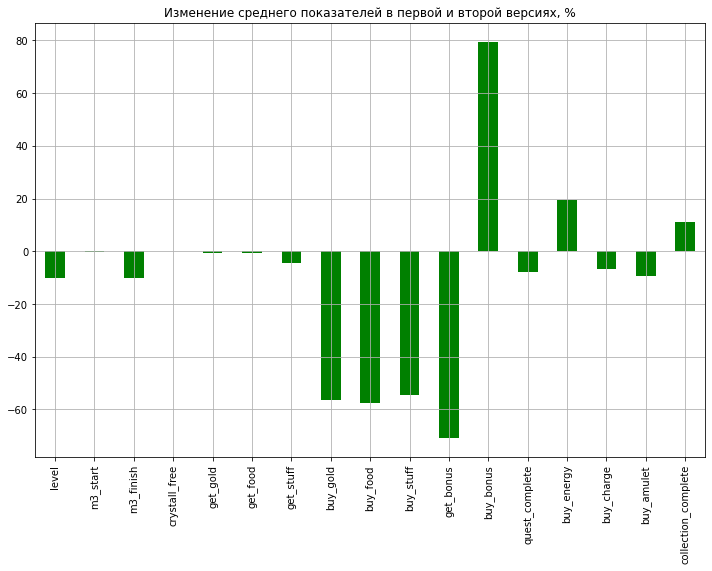

In [149]:
pd.DataFrame(changes).T.plot(
    kind='bar', 
    figsize=(12,8), 
    color='green', 
    grid=True, 
    legend=False, 
    title="Изменение среднего показателей в первой и второй версиях, %")
plt.show()

<div class="alert alert-block alert-info">
По данному графику видно, что изменение скорости производства бонусов наибольшее влияние оказало на такие игровые показатели: buy_gold, buy_food, buy_staff, get_bonus, buy_bonus, buy_energy.
    
    
- Гипотеза: средняя сумма покупки бонусов в версии 2 увеличилась. Причиной увеличения суммы покупки по показателю buy_bonus является то, что скорость производства бонусов в тотемах уменьшилась и пользователи стали больше покупать бонусы за премиум-валюту, которые призваны облегчить игроку прогресс по игре.
    
- Гипотеза: средняя сумма покупки ресурсов (золота, еды, материалов) уменьшилась. Причиной уменьшения процента суммы покупки по показателям buy_gold, buy_food, buy_staff стало то, что пользователи стали больше тратить на покупку бонусов и в результате быстрее двигаться по игре, получать золото, еду, материалы в процессе прохождения уровней Match-3, не покупая эти материалы.
    
- Гипотеза: средняя сумма полученных бонусов уменьшилась. Причиной стало изменение скорости производства бонусов в тотемах. 

    


- Есть ли на рассматриваемом игровом промежутке проблемы, требующие решения разработчиков? Что на Ваш взгляд можно было бы и изменить и как?

<div class="alert alert-block alert-info">
На мой взгляд незначительное изменение скорости производства бонусов в обратную сторону позволило бы увеличить конверсию по таким целевым показателям, как: Buy gold, Buy food, Buy bonus, Buy energy, Buy charge, Buy amulet и также увеличть среднюю сумму покупок по данным показателям, за счет этого пользователи принесли бы больше выручки. Также это изменение возвоило бы увеличить количество сессий в день на одного пользователя и другие метрики.

- Какие еще данные помогли бы Вам лучше разобраться в игре, ее проблемах, просто стоят внимания с Вашей точки зрения? Почему?

<div class="alert alert-block alert-info">С моей точки зрения лучше помог бы разбраться в игре анализ и расчет таких показателей в двух версиях игры, как:
   
- Retention rate, показатель возврата клиентов. Для этого необходимо было бы посмотреть на отношение количества пользователей за один промежуток времени к количеству пользователей другого промежутка времени (то есть количество пользователей одной версии игры и другой). В нашем случае выгружены данные за одинаковый промеуток времени и по одинаковому количеству игроков в группе.

- Churn rate, можно посчитать на основке retention rate.

- DAU, ежедневное количество активных пользователей, было бы хорошо сравнить, насколько активнее или наоборот пользуются новой версией игры.

- MAU, ежемесячное количество активныхх пользователей, аналогично ежедневному, только активность за месяц

- ARPU, Средняя выручка от пользователя. Для этого необходимо иметь данные о выручке от пользования приложением

- ARPPU, Средняя выручка от платящего пользователя, для расчета этого показателя необходимо иметь данные о выручке от покупок в игре. 

